In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [45]:
df=pd.read_csv("SAD.csv",encoding="iso-8859-1")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
ItemID           1048575 non-null int64
Sentiment        1048575 non-null int64
SentimentText    1048575 non-null object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


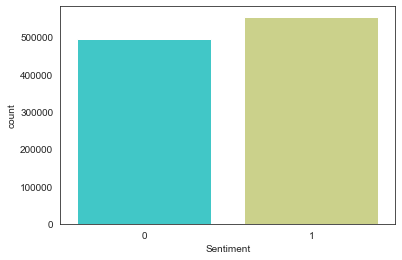

In [46]:
sns.countplot(x='Sentiment',data=df,palette='rainbow',)

In [47]:
X = df['SentimentText']
y = df['Sentiment']

In [48]:
X

0                               is so sad for my APL frie...
1                             I missed the New Moon trail...
2                                    omg its already 7:30 :O
3                    .. Omgaga. Im sooo  im gunna CRy. I'...
4                   i think mi bf is cheating on me!!!   ...
                                 ...                        
1048570    Missing my fiancee sooo badly!!!  I love you b...
1048571                                   missing my friend 
1048572    Missing my friend and my cousin. Two months pa...
1048573                                 missing my friends! 
1048574                                Missing my friends!! 
Name: SentimentText, Length: 1048575, dtype: object

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import  TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    #('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [51]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [52]:
from sklearn.metrics import confusion_matrix,classification_report
predictions = pipeline.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[116660  31203]
 [ 39543 127167]]
              precision    recall  f1-score   support

           0       0.75      0.79      0.77    147863
           1       0.80      0.76      0.78    166710

    accuracy                           0.78    314573
   macro avg       0.77      0.78      0.77    314573
weighted avg       0.78      0.78      0.78    314573



In [53]:
import re 
import tweepy 
from tweepy import OAuthHandler 

In [54]:
# keys and tokens from the Twitter Dev Console 
consumer_key = 'OtxP51Fk2sQ6UZCLfbkvqwQuo'
consumer_secret = 'LZ1UOwJcaR2biV0LEzg68c492WJortvBPjVPJM9i1DvAIw75Jp'
access_token = '1084148153463365632-7bwv4sWqYoI4BKISdAfzYpU6uCTzjW'
access_token_secret = 'GHw4o5GiPccNPln1ykkL2OyAgEnTJThO5JYXtYsnwFVrp'
  
# attempt authentication 
try: 
    # create OAuthHandler object 
    auth = OAuthHandler(consumer_key, consumer_secret) 
    # set access token and secret 
    auth.set_access_token(access_token, access_token_secret) 
    # create tweepy API object to fetch tweets 
    api = tweepy.API(auth) 
except: 
    print("Error: Authentication Failed") 

In [55]:
def clean_tweet(tweet): 
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", tweet).split())

In [56]:
tweets = [] 
try: 
    # call twitter api to fetch tweets 
    fetched_tweets = api.search(q = 'Hewlett Packard', count = 200, lang='en') 
  
    # parsing tweets one by one 
    for tweet in fetched_tweets: 
        # empty dictionary to store required params of a tweet 
        parsed_tweet = {} 
        # saving text of tweet 
        parsed_tweet['Text'] = tweet.text
        parsed_tweet['SentimentText']=clean_tweet(tweet.text)
        # saving sentiment of tweet 
        parsed_tweet['Sentiment'] =  0
  
        # appending parsed tweet to tweets list 
        if tweet.retweet_count > 0: 
            # if tweet has retweets, ensure that it is appended only once 
            if parsed_tweet not in tweets: 
                tweets.append(parsed_tweet) 
            else: 
                tweets.append(parsed_tweet)  
  
except tweepy.TweepError as e: 
    # print error (if any) 
    print("Error : " + str(e))

Tweetdf=pd.DataFrame(tweets)

In [57]:
Tweetdf

,Text,SentimentText,Sentiment
0,RT @HPE: .@Gartner_Inc rated HPE as Positive i...,RT . _Inc rated HPE as Positive in every 2020 ...,0
1,RT @WCWOA: Hewlett Packard Enterprise | HPE re...,RT Hewlett Packard Enterprise HPE review on #G...,0
2,RT @HPE: .@Gartner_Inc rated HPE as Positive i...,RT . _Inc rated HPE as Positive in every 2020 ...,0
3,RT @WCWOA: Hewlett Packard Enterprise | HPE re...,RT Hewlett Packard Enterprise HPE review on #G...,0
4,RT @HPE: .@Gartner_Inc rated HPE as Positive i...,RT . _Inc rated HPE as Positive in every 2020 ...,0
5,RT @RbWholesalers: Check out Hewlett Packard C...,RT Check out Hewlett Packard C6409-60014 AC Po...,0
6,Check out Hewlett Packard C6409-60014 AC Power...,Check out Hewlett Packard C6409-60014 AC Power...,0
7,RT @HPE: .@Gartner_Inc rated HPE as Positive i...,RT . _Inc rated HPE as Positive in every 2020 ...,0
8,RT @HPE: .@Gartner_Inc rated HPE as Positive i...,RT . _Inc rated HPE as Positive in every 2020 ...,0
9,RT @HPE: .@Gartner_Inc rated HPE as Positive i...,RT . _Inc rated HPE as Positive in every 2020 ...,0


In [58]:
Z=Tweetdf['SentimentText']

In [59]:
Tweetdf['Sentiment'] = pipeline.predict(Z)

In [60]:
Tweetdf

,Text,SentimentText,Sentiment
0,RT @HPE: .@Gartner_Inc rated HPE as Positive i...,RT . _Inc rated HPE as Positive in every 2020 ...,1
1,RT @WCWOA: Hewlett Packard Enterprise | HPE re...,RT Hewlett Packard Enterprise HPE review on #G...,1
2,RT @HPE: .@Gartner_Inc rated HPE as Positive i...,RT . _Inc rated HPE as Positive in every 2020 ...,1
3,RT @WCWOA: Hewlett Packard Enterprise | HPE re...,RT Hewlett Packard Enterprise HPE review on #G...,1
4,RT @HPE: .@Gartner_Inc rated HPE as Positive i...,RT . _Inc rated HPE as Positive in every 2020 ...,1
5,RT @RbWholesalers: Check out Hewlett Packard C...,RT Check out Hewlett Packard C6409-60014 AC Po...,0
6,Check out Hewlett Packard C6409-60014 AC Power...,Check out Hewlett Packard C6409-60014 AC Power...,0
7,RT @HPE: .@Gartner_Inc rated HPE as Positive i...,RT . _Inc rated HPE as Positive in every 2020 ...,1
8,RT @HPE: .@Gartner_Inc rated HPE as Positive i...,RT . _Inc rated HPE as Positive in every 2020 ...,1
9,RT @HPE: .@Gartner_Inc rated HPE as Positive i...,RT . _Inc rated HPE as Positive in every 2020 ...,1


In [61]:
for ind in Tweetdf.index:
    if Tweetdf['Sentiment'][ind]==1:
        Tweetdf['Sentiment'][ind]='pos'
    else:
        Tweetdf['Sentiment'][ind]='neg'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [62]:
Tweetdf

,Text,SentimentText,Sentiment
0,RT @HPE: .@Gartner_Inc rated HPE as Positive i...,RT . _Inc rated HPE as Positive in every 2020 ...,pos
1,RT @WCWOA: Hewlett Packard Enterprise | HPE re...,RT Hewlett Packard Enterprise HPE review on #G...,pos
2,RT @HPE: .@Gartner_Inc rated HPE as Positive i...,RT . _Inc rated HPE as Positive in every 2020 ...,pos
3,RT @WCWOA: Hewlett Packard Enterprise | HPE re...,RT Hewlett Packard Enterprise HPE review on #G...,pos
4,RT @HPE: .@Gartner_Inc rated HPE as Positive i...,RT . _Inc rated HPE as Positive in every 2020 ...,pos
5,RT @RbWholesalers: Check out Hewlett Packard C...,RT Check out Hewlett Packard C6409-60014 AC Po...,neg
6,Check out Hewlett Packard C6409-60014 AC Power...,Check out Hewlett Packard C6409-60014 AC Power...,neg
7,RT @HPE: .@Gartner_Inc rated HPE as Positive i...,RT . _Inc rated HPE as Positive in every 2020 ...,pos
8,RT @HPE: .@Gartner_Inc rated HPE as Positive i...,RT . _Inc rated HPE as Positive in every 2020 ...,pos
9,RT @HPE: .@Gartner_Inc rated HPE as Positive i...,RT . _Inc rated HPE as Positive in every 2020 ...,pos


In [64]:
Tweetdf.to_csv('nlpop.csv')
